In [1]:
#Started on 30-July-2019
import pandas as pd
import re
from pycontractions import Contractions

# 1. Exploring Data

In [2]:
#reading in the tweets
col_names = ['target', 'Tweet ID', 'Date & Time', 'Flags', 'TwitterHandle', 'Tweet Body']
tweets_raw = pd.read_csv("sentiment140/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1",\
                         header = None, names = col_names)

In [3]:
tweets_raw.head(5)

,target,Tweet ID,Date & Time,Flags,TwitterHandle,Tweet Body
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets_raw.sample(frac=0.00001, random_state=3).iloc[0]

target                                                           4
Tweet ID                                                1824861422
Date & Time                           Sun May 17 03:15:54 PDT 2009
Flags                                                     NO_QUERY
TwitterHandle                                           vinuthomas
Tweet Body       @mixdev I think i still have a copy of turbo c...
Name: 954523, dtype: object

In [5]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
target           1600000 non-null int64
Tweet ID         1600000 non-null int64
Date & Time      1600000 non-null object
Flags            1600000 non-null object
TwitterHandle    1600000 non-null object
Tweet Body       1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
tweets_raw.target.value_counts()

4    800000
0    800000
Name: target, dtype: int64

# 2. Basic Preprocessing
### i - @Mentions removal
### ii - Links removal
### iii - Hashtags removal
### iv - Contractions Expansion
### v - Punctuations Removal
### vi - Stripping extra whitespaces & converting to lowercase

In [7]:
links_regex = re.compile(r"""
                         (https://){1,1}[\w\S]+ |   #capturing https://xxx.xxx.xxx group
                         ([\w\S]+\.[\S]+)+ |        #capturing xxx.xx.xxx/xx group, until whitespace encountered
                         (http://){1,1}[\w\S]+ |    #capturing http://xxx,,xx. group until whitespace encountered
                         (link:)+                   #capturing link: group to remove the html-link tag from tweets
                         """, re.VERBOSE)
hashtags_regex = re.compile(r"""
                            \#{1,1}[a-zA-Z0-9_]+     #capturing hastags #lets but not areaa#lets
                            """, re.VERBOSE)
usertag_regex = re.compile(r"""
                            @{1,1}[a-zA-Z0-9_]+      #capturing @usernames of @lets but not areaa@lets
                            """, re.VERBOSE)
punctuations_regex = re.compile(r"""
                                \W+                 #capturing non-alphanumeric characters
                                """, re.VERBOSE)

### Applying all that on a smaller dataset, before going all out

In [8]:
# #Loading a pre-trained GloVe model - SLOWW! Don't run simply
# cont = Contractions(api_key="glove-twitter-100")
# cont.load_models()
# #Trials
# x = "i'd rather don't do it bcoz it isn't right and isn t cool"
# y = list(cont.expand_texts([x], precise = True))
# z = y[0]
# z

## Function for basic_cleaning

In [9]:
def basic_clean(one_tweet):
    """
    Function to do the basic cleaning of the tweets like 
    - removing @mentions
    - removing weblinks: https://......, http://...., twitter.com, google.com, etc.
    - removing hashtags
    - expanding contracted words: using GloVe Twitter 100d model, works perfect. But too slow for 1.6m tweets.
    So not implementing on the complete dataset
    - removing punctuations once the contractions are expanded
    - converting tweets to lowercase & stripping extra spaces
    """
    one_tweet = usertag_regex.sub(" ", one_tweet)
    one_tweet = links_regex.sub(" ", one_tweet)
    one_tweet = hashtags_regex.sub(" ", one_tweet)
    #Expanding contractions using the cont models loaded above, but not implementing in the total data set.
    #Too slow
    #temp = list(cont.expand_texts([one_tweet], precise = True))
    #one_tweet = temp[0]
    one_tweet = punctuations_regex.sub(" ", one_tweet)
    one_tweet = one_tweet.lower().strip()
    return one_tweet

In [10]:
# tweets_raw_head['CleanedBody'] = ''
# %%time
# tweets_raw_head['CleanedBody'] =  tweets_raw_head['Tweet Body'].apply(lambda one_tweet:basic_clean(one_tweet))
# #Testing on a smaller data to see if it works fine
# tweets_raw_head
# #Works perfect
# #Not implementing in the complete dataset though as it will take a lot of time
# tweets_raw_head.to_excel("Cleaned_GloVe_Expanded_Head_Tweets.xlsx", encoding = "ISO-8859-1")

## Applying on the complete dataset

In [11]:
tweets_cleaned = tweets_raw.drop(tweets_raw.columns[[1,2,3,4]], axis = 1)
tweets_cleaned['CleanedBody'] = ''
tweets_cleaned['CleanedBody'] = tweets_cleaned['Tweet Body'].apply(lambda one_tweet:basic_clean(one_tweet))
tweets_cleaned

,target,Tweet Body,CleanedBody
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that s a bummer you shoulda got david car...
1,0,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...
5,0,@Kwesidei not the whole crew,not the whole crew
6,0,Need a hug,need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see rains a bit only a bit lo...
8,0,@Tatiana_K nope they didn't have it,nope they didn t have it
9,0,@twittera que me muera ?,que me muera


# 3. More Preprocessing & Data Preparation 
### i. Tokenizing & Lemmatization
### ii. Stopwords Removal
### iii. Dropping empty cell rows

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

### Tokenizing

In [13]:
sample_data = tweets_cleaned.head(5)
sample_data['TokenizedTweet'] = sample_data['CleanedBody'].apply(lambda one_cleaned_tweet:word_tokenize(one_cleaned_tweet))

/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Function for Lemmatization

In [14]:
def lemmatization(one_tokenized_tweet):
    lemma = WordNetLemmatizer()
    lemmatized_tweet = []
    for word in one_tokenized_tweet:
        #print(word)
        lemmatized_tweet.append(lemma.lemmatize(word, "v"))
        #print("Lemmatized Tweet = " + str(lemmatized_tweet))
    return lemmatized_tweet

In [15]:
sample_data['TokenizedTweet'] = sample_data['TokenizedTweet'].apply(lambda one_tokenized_tweet:lemmatization(one_tokenized_tweet))

/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Function for Stopwords Removal

In [16]:
def stop_words_removal(one_clean_tweet):
    #179 stopwords for English language
    stop_words = set(stopwords.words("english"))
    stopwords_removed_tweet = ''
    for word in one_clean_tweet:
        if word not in stop_words:
            #print(word + " is not a stopword.")
            stopwords_removed_tweet = stopwords_removed_tweet + ' ' + word
            #print("Stopword Removed Tweet = " + stopwords_removed_tweet)
    stopwords_removed_tweet = punctuations_regex.sub(" ", stopwords_removed_tweet).strip()
    return stopwords_removed_tweet

In [17]:
sample_data['StopWordsRemoved'] = sample_data['TokenizedTweet'].apply(lambda one_clean_tweet:stop_words_removal(one_clean_tweet))

/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Dropping empty cell rows

In [18]:
import numpy as np

In [19]:
def dropping_empty_cell_rows(tweets_data_frame):
    """
    Function to drop those rows whose "StopWordsRemoved" column is empty.
    Replacing it with NaN using numpy and then dropping them
    """
    tweets_data_frame['StopWordsRemoved'].replace('', np.nan, inplace = True)
    tweets_data_frame.dropna(subset = ['StopWordsRemoved'], inplace = True)
    return tweets_data_frame

In [20]:
sample_data = dropping_empty_cell_rows(sample_data)

/home/shitbot009/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Applying everything on the complete dataset

In [21]:
#Tokenizing
tweets_cleaned['TokenizedTweet'] = tweets_cleaned['CleanedBody'].apply(lambda one_cleaned_tweet:word_tokenize(one_cleaned_tweet))
#Lemmatization
tweets_cleaned['TokenizedTweet'] = tweets_cleaned['TokenizedTweet'].apply(lambda one_tokenized_tweet:lemmatization(one_tokenized_tweet))
#StopWordsRemoval
tweets_cleaned['StopWordsRemoved'] = tweets_cleaned['TokenizedTweet'].apply(lambda one_clean_tweet:stop_words_removal(one_clean_tweet))
#DroppingEmptyRowCells
tweets_cleaned = dropping_empty_cell_rows(tweets_cleaned)

In [22]:
tweets_cleaned.shape

(1589209, 5)

From shape I can see that the number of non-empty tweets after cleaning has come down to 1,589,209 tweets from 1,600,000 tweets. That shows that 10,791 tweets after cleaning were nothing but empty. So dropped.

In [23]:
1600000 - 1589209

10791

# 4. Exploratory Data Analysis

In [24]:
tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589209 entries, 0 to 1599999
Data columns (total 5 columns):
target              1589209 non-null int64
Tweet Body          1589209 non-null object
CleanedBody         1589209 non-null object
TokenizedTweet      1589209 non-null object
StopWordsRemoved    1589209 non-null object
dtypes: int64(1), object(4)
memory usage: 72.7+ MB


In [25]:
tweets_cleaned.target.value_counts()
# 4 - positive
# 2 - neutral
# 0 - negative

4    794790
0    794419
Name: target, dtype: int64

#### Tokenizing the StopWordsRemoved Tweets for EDA

In [26]:
tweets_cleaned['TokenizedTweet'] = tweets_cleaned['StopWordsRemoved'].apply(lambda one_cleaned_tweet:word_tokenize(one_cleaned_tweet))

#### Creating a list of all the words of all the tokenized tweets

In [27]:
sample_tweets = tweets_cleaned.head(50)
list_of_all_tokens = sample_tweets['TokenizedTweet'].tolist()

#### Creating a SINGLE MERGED LIST from the list of lists obtained above

In [28]:
import itertools

In [29]:
merged_list_of_tokens = list(itertools.chain.from_iterable(list_of_all_tokens))
len(merged_list_of_tokens)

342

In [30]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
freq_dist = FreqDist(merged_list_of_tokens)
print(freq_dist)
#Changing the size of the figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#Plotting the frequrncy of the top 50 words
freq_dist.plot(50, cumulative = False)
plt.show()

<FreqDist with 245 samples and 342 outcomes>


<Figure size 1850x1050 with 1 Axes>

## Making WordCloud

In [31]:
from PIL import Image
from wordcloud import WordCloud

In [32]:
#Making a continuous string from the list of words to be fed into the WordCloud Function
all_words = " ".join(merged_list_of_tokens)

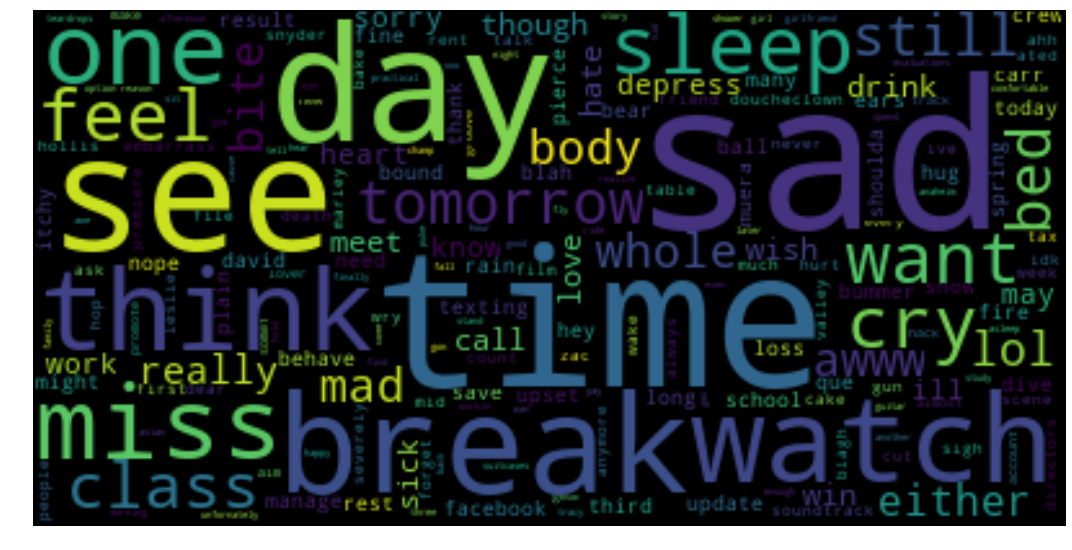

In [33]:
wc = WordCloud(min_word_length=3, include_numbers=False).generate(all_words) #inbuilt stopwords are being used
#Changing the size of the figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Applying on Complete Dataset

In [34]:
#Creating a list of the TokenizedTweet Column
list_of_all_tokens = tweets_cleaned['TokenizedTweet'].tolist()
#Merging the list of lists into one single list
merged_list_of_tokens = list(itertools.chain.from_iterable(list_of_all_tokens))
#Joining all the words in the list to one single string
all_words = " ".join(merged_list_of_tokens)

In [52]:
tokens_df = pd.DataFrame(merged_list_of_tokens)
tokens_df.columns = ['tokens']

In [59]:
freq = tokens_df.tokens.value_counts()
type(freq)

pandas.core.series.Series

<FreqDist with 256500 samples and 11057326 outcomes>


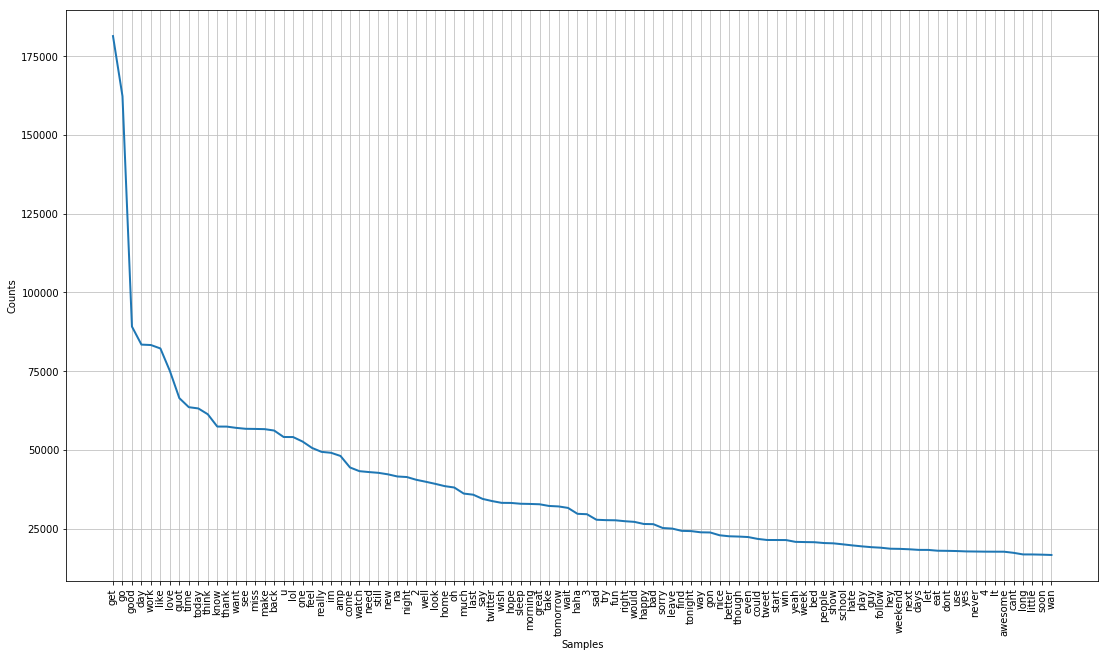

In [64]:
freq_dist = FreqDist(merged_list_of_tokens)
print(freq_dist)
#Changing the size of the figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#Plotting the frequrncy of the top 50 words
freq_dist.plot(100, cumulative = False)
plt.show()

In [62]:
len(merged_list_of_tokens)
# 11,057,326 words in all after cleaning

11057326

### Can't apply WordCloud on whole text as it is hanging up the system

In [ ]:
# wc_fulldata = WordCloud(min_word_length=3, include_numbers=False).generate(all_words) #inbuilt stopwords are being used
# #Changing the size of the figure
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# plt.imshow(wc_fulldata, interpolation='bilinear')
# plt.axis("off")
# plt.show()

# 5. Building the Model

## Feature Extraction - using TF-IDF
#### TF-IDF : Term Frequency - Inverse Document Frequency

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

Converting the Cleaned Tweets to numpy array and the snetiment too. For feature extraction

In [114]:
cleaned_tweets_variables = np.array(tweets_cleaned.head(50).append(tweets_cleaned.tail(50))['StopWordsRemoved'])
cleaned_tweets_labels = np.array(tweets_cleaned.head(50).append(tweets_cleaned.tail(50))['target'])

In [116]:
cleaned_tweets_labels.shape

(100,)

In [158]:
#Creating a TfIdfVectorizer object with specified settings
tf_idf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

#### .fit_transform() function returns a Document-Term Matrix as features

In [159]:
document_term_matrix = tf_idf_vec.fit_transform(cleaned_tweets_variables)

In [119]:
type(document_term_matrix)

scipy.sparse.csr.csr_matrix

### Applying on complete dataset

In [155]:
cleaned_tweets_variables = np.array(tweets_cleaned['StopWordsRemoved'])
cleaned_tweets_labels = np.array(tweets_cleaned['target'])

In [160]:
document_term_matrix = tf_idf_vec.fit_transform(cleaned_tweets_variables)

KeyboardInterrupt: 

## Training Classifier

In [156]:
# document_term_matrix = X
# cleaned_tweets_labels = y
X = document_term_matrix
y = cleaned_tweets_labels

### Logistic Regression Classifier

In [125]:
from sklearn.linear_model import LogisticRegression

In [157]:
logRegModel = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.75, multi_class='auto', C=1.0)
logRegModel.fit(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [100, 1589209]

### Applying on complete dataset
Replacing the cleaned_tweets_variables & cleaned_tweets_labels above

### Naive-Bayes Classifier

In [121]:
from sklearn.naive_bayes import MultinomialNB

#### Multinomial Naive Bayes classifier for Multinomial Models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., **word counts for text classification**). The multinomial distribution normally _**requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.**_

Source: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [127]:
NB_Model = MultinomialNB()
NB_Model.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 6. Predicting & Evaluating the Models built

In [137]:
from sklearn.metrics import roc_auc_score

Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

### Logistic Classifier Model

In [133]:
LRModel_posProb = logRegModel.predict_proba(X)

In [144]:
ROCAUC_Score_LRClassifier = roc_auc_score(y, LRModel_posProb[:,1])

In [145]:
ROCAUC_Score_LRClassifier

0.55

In [153]:
LRModel_posProb

array([[0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.53474395, 0.46525605],
       [0.50114329, 0.49885671],
       [0.50114329, 0.49885671],
       [0.

### Naive-Bayes Classifier - Multinomial

In [150]:
MultinomialNB_posProb = NB_Model.predict_proba(X)

In [151]:
ROCAUC_Score_NBClassifier = roc_auc_score(y, MultinomialNB_posProb[:,1])

In [152]:
ROCAUC_Score_NBClassifier

1.0

In [154]:
MultinomialNB_posProb

(100, 2)